## **Autores**

Rodrigo Makoto Takumi **176897**

Carlos Augusto Jardim Chiarelli **165685**

# **09 - Erro estacionário**

$$ $$

In [3]:
# bibliotecas
import numpy as np
import sympy as sp
import matplotlib.pyplot       as plt
from   numpy                   import sqrt
from   scipy.signal            import lsim, lti, step, impulse
from   IPython.core.pylabtools import figsize
from   IPython.display         import Image
from   platform                import python_version

figsize(12, 8)                         # tamanho gráficos
plt.rcParams.update({'font.size': 14}) # tamanho da fonte
sp.init_printing()                     # printar variáveis simbólicas

print('\nVersão da Linguagem Python usada neste relatório: %s\n' % python_version())


Versão da Linguagem Python usada neste relatório: 3.7.6



$$ $$ 

# Exercício 01

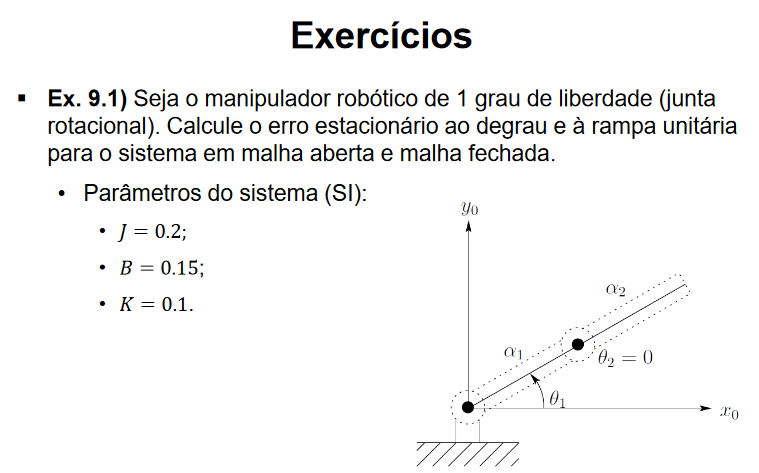

In [32]:
Image('../dados/imagens/09_exe_1.png')

Modelo mecânico:

$$ $$

$$ T(t) = J \ddot \theta(t) + B \dot \theta(t) + K \theta(t) $$

$$ $$

$$ \omega_{n} = \sqrt \frac{K}{J} $$

$$ $$

$$ \xi = \frac{B}{2 \sqrt {KJ}} $$

$$ $$

$$ \omega_{d} = \omega_{n} \sqrt{1 - \xi ^2} $$

$$ $$

Abaixo temos a função de transferência desse sistema **em malha aberta**:

$$ $$

$$ G(s) = \frac{\theta(s)}{T(s)}$$

$$ $$

$$ G(s) = \frac{\omega_{n}^2}{s^2 + 2 \xi \omega_{n}s + \omega_{n}^2}$$

$$ $$

A função de transferência **em malha fechada** é:

$$ $$

$$ H(s) = \frac{G(s)}{1+G(s)} $$

$$ $$

In [5]:
# propriedades do sistema
J, B, K = 0.2, 0.15, 0.1

omega_n = sqrt(K/J)
Csi     = B/(2*sqrt(K*J))
omega_d = omega_n*sqrt(1-Csi**2)

print('\nomega_n = %.3f rad/s \nCsi = %.3f \nomega_d = %.3f rad/s \n' % (omega_n, Csi, omega_d))


omega_n = 0.707 rad/s 
Csi = 0.530 
omega_d = 0.599 rad/s 



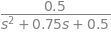

In [6]:
s = sp.symbols('s')

G = omega_n**2/(s**2 + 2*Csi*omega_n*s + omega_n**2)
G

Acima temos a função de transferência para malha aberta.

$$ $$

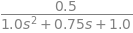

In [7]:
H = G/(1+G)
sp.factor(H,s)

Acima temos a função de transferência para malha fechada com realimentação unitária (degra unitário).

$$ $$

In [8]:
np.roots([1, .75, 1])

array([-0.375+0.92702481j, -0.375-0.92702481j])

$$ $$

Nota-se que é um **sistema tipo zero**.

$$ $$

Abaixo observamos a resposta do sistema ao degrau unitário tanto para malha aberta quanto fechada:


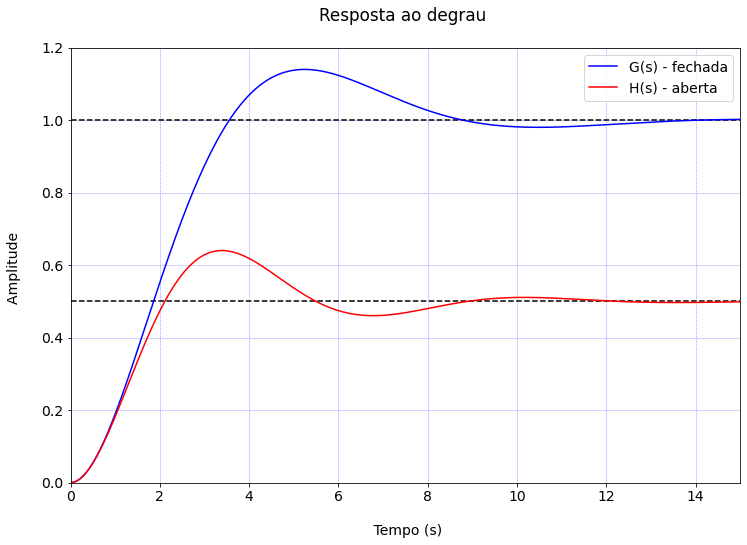

In [15]:
dt = 1e-3
t  = np.arange(0, 15, dt)

Gs_num = [.5]
Gs_den = [1, .75, .5]

Hs_num = [.5]
Hs_den = [1, .75, 1]

LTI_G = lti(Gs_num, Gs_den) # gerando o sistema
LTI_H = lti(Hs_num, Hs_den) # gerando o sistema

t_G, y_G = step(LTI_G, T=t) # resposta ao degrau
t_H, y_H = step(LTI_H, T=t) # resposta ao degrau

# plot
plt.plot(t_G, y_G,   label='G(s) - fechada', color='b')
plt.plot(t_H, y_H,   label='H(s) - aberta',  color='r')
plt.hlines(1, 0,15, colors='black',linestyles='dashed')
plt.hlines(.5,0,15, colors='black',linestyles='dashed')

plt.title('Resposta ao degrau \n')
plt.xlabel('\n Tempo (s)')
plt.ylabel('Amplitude \n')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.xlim(0,15)
plt.ylim(0,1.2)
plt.legend()
plt.show()


$$ $$

Para o sistema em **malha aberta** temos o seguinte erro estacionário ao degrau:

$$ $$

$$ e_{ss} = 1 - \lim_{s \to 0} sG(s)\frac{1}{s} = 1-1 = 0 $$

$$ $$

Pela resposta ao degrau vemos que realmente o sistema atinge o valor final para a entrada unitária.

$$ $$

Para o sistema em **malha fechada** temos o seguinte erro estacionário ao degrau:

$$ $$

$$ K_{p} = \lim_{s \to 0} G(s) = 1 $$

$$ $$

$$ e_{ss} = \frac{1}{1+K_{p}} = 0.5 $$

$$ $$

Abaixo analisamos a **resposta à rampa**, notando-se um **erro estacionário infinito**.

$$ $$

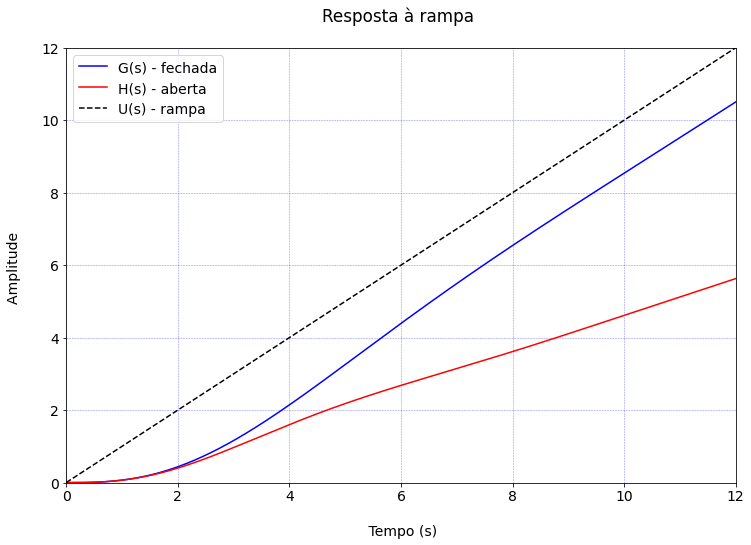

In [29]:
Gs = (Gs_num, Gs_den)
Hs = (Hs_num, Hs_den)

u_rampa = np.interp(t, [0,15], [0, 15])

t_G, y_G, x_out = lsim(Gs, u_rampa, t)
t_H, y_H, x_out = lsim(Hs, u_rampa, t)

# plot
plt.plot(t_G, y_G,     label='G(s) - fechada', color='b')
plt.plot(t_H, y_H,     label='H(s) - aberta',  color='r')
plt.plot(t,   u_rampa, label='U(s) - rampa',  linestyle='dashed', color='black')

plt.title('Resposta à rampa \n')
plt.xlabel('\n Tempo (s)')
plt.ylabel('Amplitude \n')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.xlim(0,12)
plt.ylim(0,12)
plt.legend()
plt.show()


Acima notamos que o erro de $G(s)$ é constante enquanto o erro de $H(s)$ aumenta com o tempo (tende a infinito).

$$ $$ 

# Exercício 02

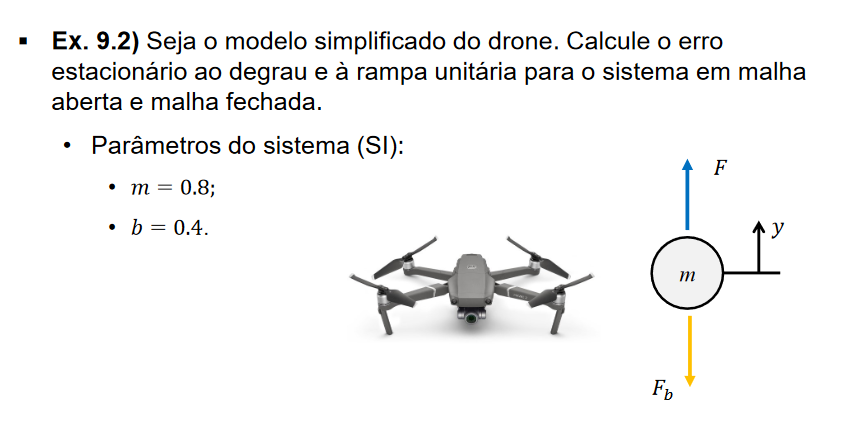

In [33]:
Image('../dados/imagens/09_exe_2.png')

$$ $$

Apartir do DCL temos:

$$ m\ddot{y}(t) + b\dot{y}(t) = F(t) $$

$$ $$

Aplicando a transformada de Laplace:

$$ $$

$$ ms^2Y(s) + bsY(s) = F(s) $$

$$ $$

Assim, a função de transferência é:

$$ $$

$$ G(s) = \frac{Y(s)}{F(s)} = \frac{1}{ms^2 + bs} $$

$$ $$

Fatorando a equação, temos a **função de transferência** para **malha aberta**:

$$ $$

$$ G(s) = \frac{1}{s(ms + b)} $$

$$ $$

Trata-se de um **sistema do tipo 1**.

$$ $$

A **função de transferência** para **malha fechada** é:

$$ $$

$$ H(s) = \frac{G(s)}{1+G(s)}$$

$$ $$

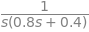

In [34]:
m=0.8
b=0.4

s = sp.symbols('s')

G = 1/(s*(m*s + b))
G

Função de transferência $G(s)$ em malha aberta.

$$ $$

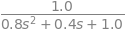

In [36]:
H = G/(1+G)
sp.factor(H, s)

Função de transferência $H(s)$ em malha fechada.

$$ $$

Analisando o **erro estacionário** da resposta ao **degrau** em ambas as malhas:

$$ $$

* malha aberta

$$ $$

$$ e_{ss} = 1 - \lim_{s \to 0} sG(s)\frac{1}{s} = -\infty $$

$$ $$

* malha fechada

$$ $$

$$ K_{p} = \lim_{s \to 0} G(s) = \infty $$

$$ $$

$$ e_{ss} = \frac{1}{1+ K _{p}} = 0$$

$$ $$

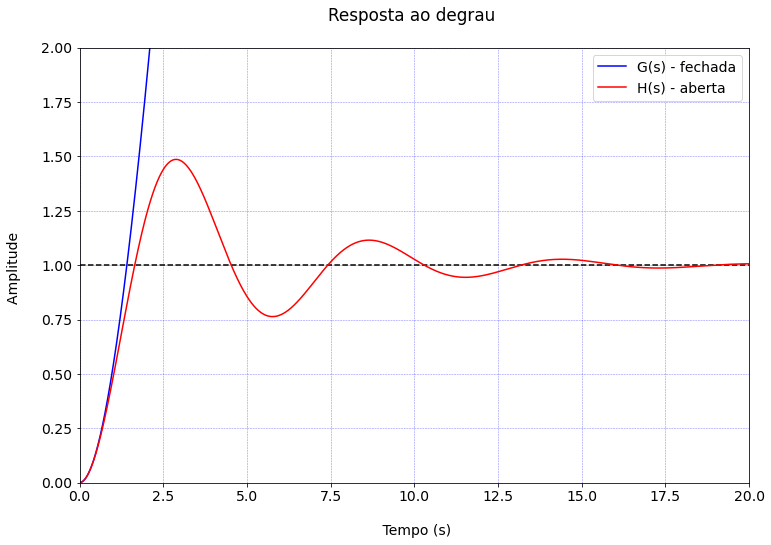

In [43]:
dt = 1e-3
t  = np.arange(0, 20, dt)

Gs_num = [1]
Gs_den = [.8, .4, 0]

Hs_num = [1]
Hs_den = [.8, .4, 1]

LTI_G = lti(Gs_num, Gs_den) # gerando o sistema
LTI_H = lti(Hs_num, Hs_den) # gerando o sistema

t_G, y_G = step(LTI_G, T=t) # resposta ao degrau
t_H, y_H = step(LTI_H, T=t) # resposta ao degrau

# plot
plt.plot(t_G, y_G,   label='G(s) - fechada', color='b')
plt.plot(t_H, y_H,   label='H(s) - aberta',  color='r')
plt.hlines(1, 0,20, colors='black',linestyles='dashed')

plt.title('Resposta ao degrau \n')
plt.xlabel('\n Tempo (s)')
plt.ylabel('Amplitude \n')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.xlim(0,20)
plt.ylim(0,2)
plt.legend()
plt.show()


$$ $$ 

Analisando o **erro estacionário** da resposta a **rampa** em ambas as malhas:

$$ $$

* malha aberta

$$ $$

$$ e_{ss} = \infty $$

$$ $$

* malha fechada

$$ $$

$$ K_{v} = \lim_{s \to 0} sG(s) = 2.5 $$

$$ $$

$$ e_{ss} = \frac{1}{K_{v}} = 0.4$$

$$ $$


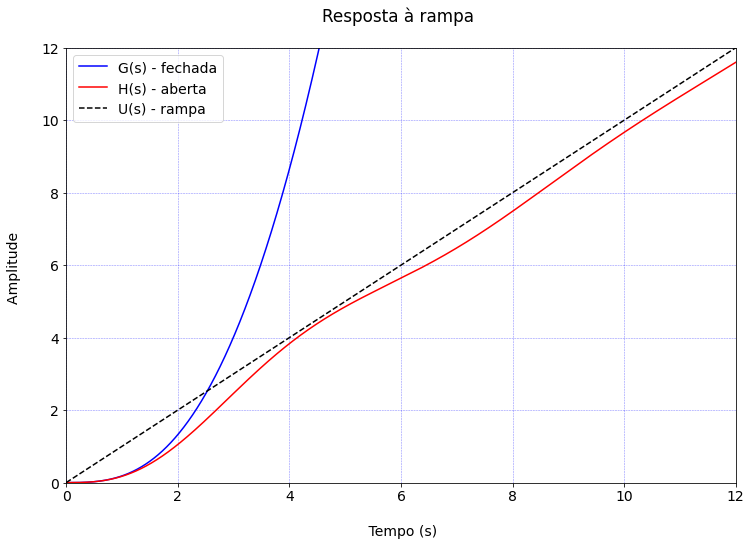

In [48]:
# entrada (rampa)
u_rampa = np.interp(t, [0,20], [0, 20])

Gs = (Gs_num, Gs_den)
Hs = (Hs_num, Hs_den)

t_G, y_G, x_out = lsim(Gs, u_rampa, t)
t_H, y_H, x_out = lsim(Hs, u_rampa, t)

# plot
plt.plot(t_G, y_G,     label='G(s) - fechada', color='b')
plt.plot(t_H, y_H,     label='H(s) - aberta',  color='r')
plt.plot(t,   u_rampa, label='U(s) - rampa',  linestyle='dashed', color='black')

plt.title('Resposta à rampa \n')
plt.xlabel('\n Tempo (s)')
plt.ylabel('Amplitude \n')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.xlim(0,12)
plt.ylim(0,12)
plt.legend()
plt.show()